In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline 

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
#to check data type of features
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [5]:
#to change data type to data time format
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [6]:
#to extract date year, month, day and hour from Datetime
for i in (train, test, train_original, test_original):
    i['year']= i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [7]:
#making weekday variable to inspect effect of weekday on traffic
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [8]:
#assign 1-weekend, 0-weekday
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [9]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


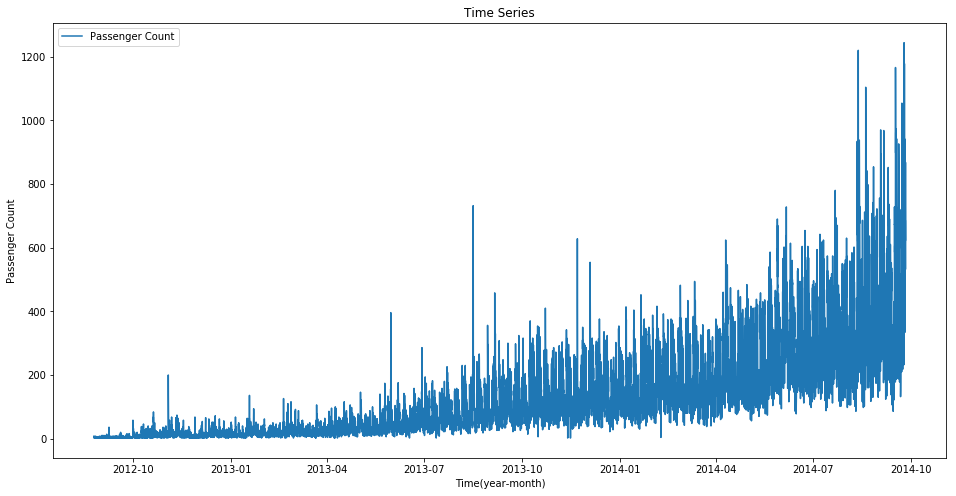

In [10]:
#visualize the time series
train.index = train['Datetime'] #index datetime to get time period on x-axis
df = train.drop('ID',axis=1) #drop ID
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

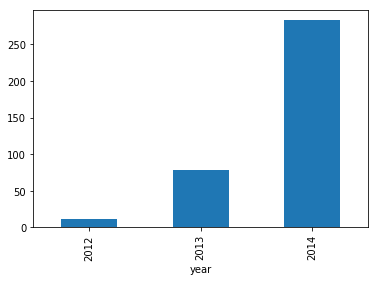

In [11]:
#hypothesis says traffic will increase with time
#assess yearly passenger count
train.groupby('year')['Count'].mean().plot.bar()

exponential growth in traffic with year

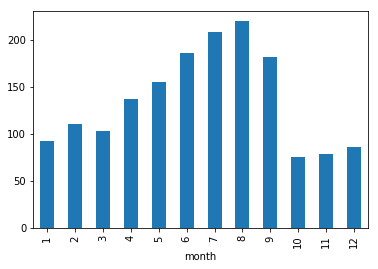

In [12]:
#hypothesis-higher traffic from May to October
train.groupby('month')['Count'].mean().plot.bar()

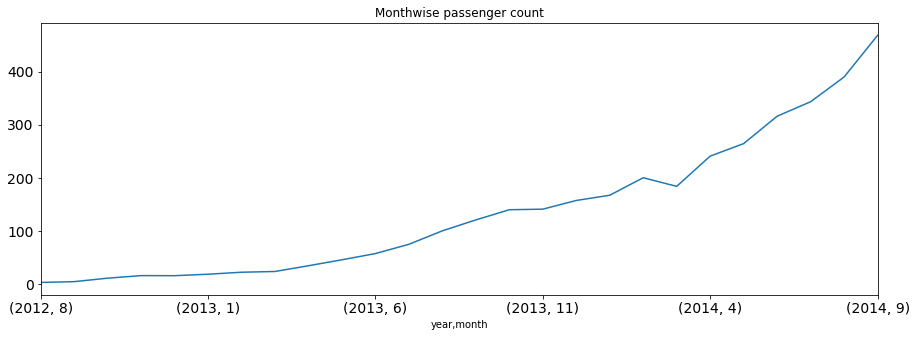

In [13]:
#to check monthly mean of each year separately
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize = (15,5), title = 'Monthwise passenger count', fontsize = 14)

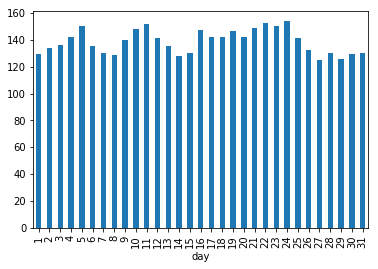

In [14]:
#daily mean of passenger count
train.groupby('day')['Count'].mean().plot.bar()

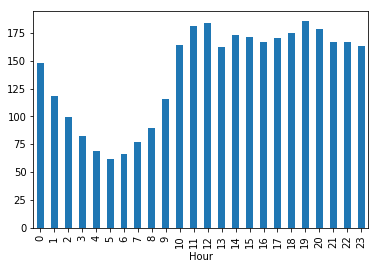

In [15]:
#hypothesis-traffic will be more during peak hours
#mean of hourly passenger count
train.groupby('Hour')['Count'].mean().plot.bar()

peak time-7pm
decreasing trend till 5am

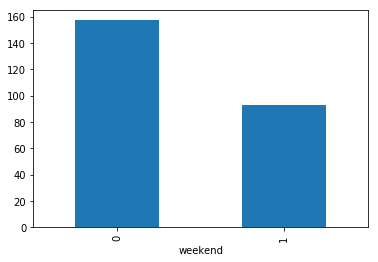

In [16]:
#hypothesis-traffic will be more on weekdays
train.groupby('weekend')['Count'].mean().plot.bar()

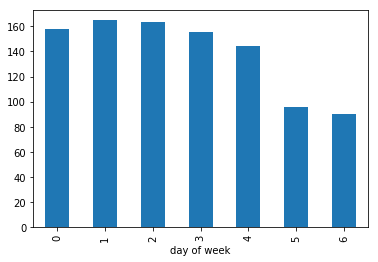

In [17]:
#day wise passenger count
train.groupby('day of week')['Count'].mean().plot.bar()
#0-Monday, 6-Sunday

In [18]:
#drop ID
train = train.drop('ID',axis=1)

In [19]:
#aggregating hourly to daily, weekly and monthly
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H-%M')
train.index = train.Timestamp

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [20]:
#hourly time series
hourly = train.resample('H').mean()

In [21]:
#converting to daily mean
daily = train.resample('D').mean()

In [22]:
#weekly
weekly = train.resample('W').mean()

In [23]:
#montly
monthly = train.resample('M').mean()

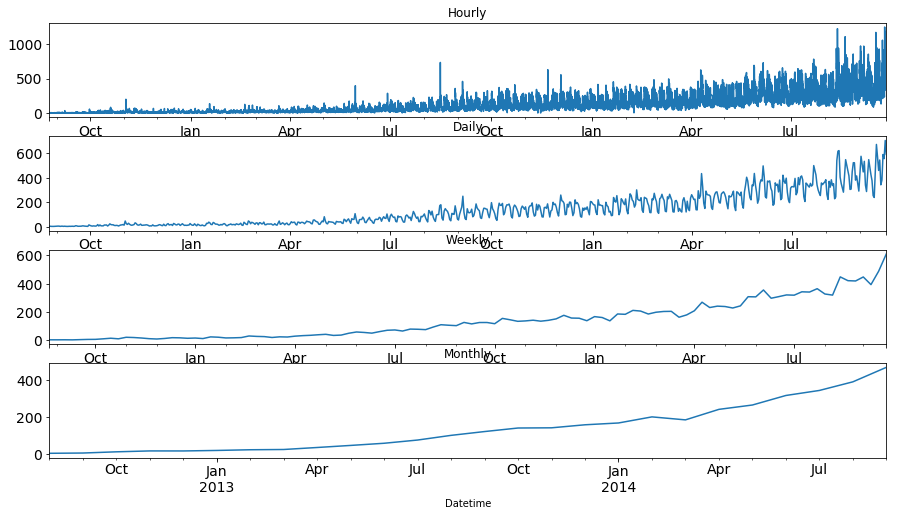

In [24]:
#visualizing hourly, daily, weekly and monthly time series
fig, axis = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title = 'Hourly', fontsize=14, ax = axis[0])
daily.Count.plot(figsize = (15,8), title = 'Daily', fontsize=14, ax = axis[1])
weekly.Count.plot(figsize = (15,8), title = 'Weekly', fontsize=14, ax = axis[2])
monthly.Count.plot(figsize=(15,8), title = 'Monthly', fontsize=14, ax = axis[3])
plt.show()

In [25]:
test.Timestamp = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H-%M')
test.index = test.Timestamp

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [26]:
#daily mean
test = test.resample('D').mean()

In [27]:
train.timeStamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H-%M')
train.index = train.Timestamp
train = train.resample('D').mean()

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [28]:
train_split = train.ix['2012-08-25':'2014-06-24']
valid_split = train.ix['2014-06-25':'2014-09-25']

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


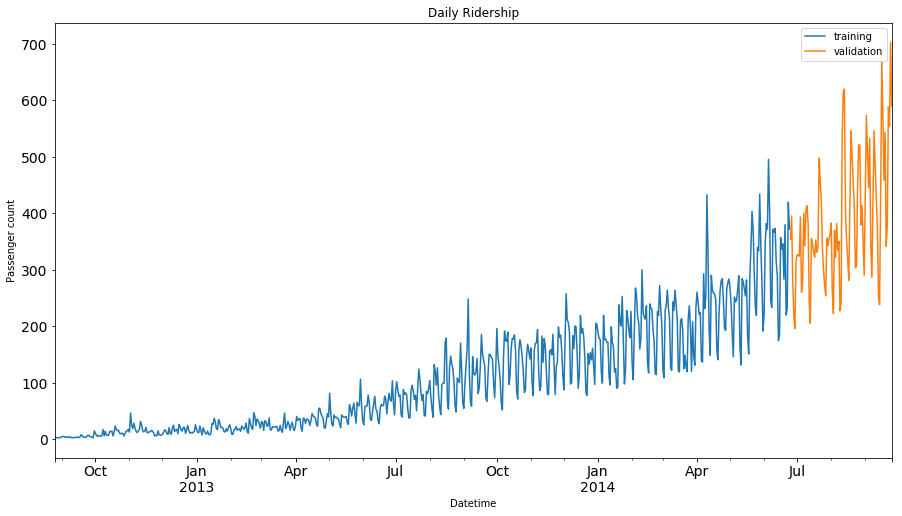

In [29]:
train_split.Count.plot(figsize=(15,8),title = 'Daily Ridership', fontsize=14, label='training')
valid_split.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize=14, label='validation')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()

# Naive Approach

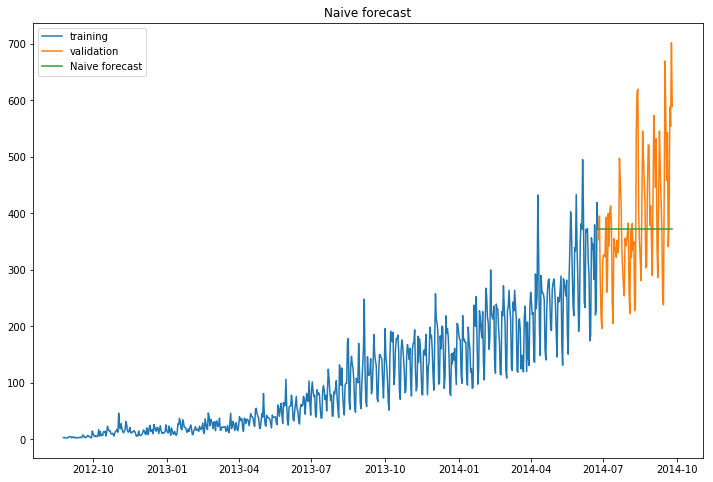

In [30]:
dd = np.asarray(train_split.Count)
y_hat = valid_split.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train_split.index, train_split['Count'], label='training')
plt.plot(valid_split.index, valid_split['Count'], label='validation')
plt.plot(y_hat.index, y_hat['naive'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive forecast')
plt.show()

In [31]:
#accuracy check, rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = mean_squared_error(valid_split.Count, y_hat.naive)
rmse

12497.116935483871

# Moving Average

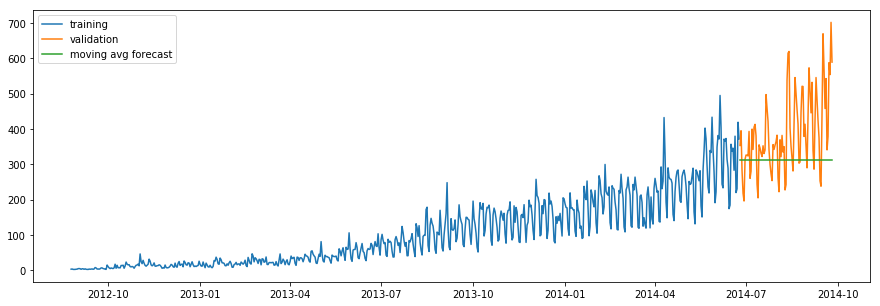

In [32]:
#10 days average
y_hat_avg = valid_split.copy()
y_hat_avg['moving avg forecast'] = train_split['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train_split['Count'], label='training')
plt.plot(valid_split['Count'], label='validation')
plt.plot(y_hat_avg['moving avg forecast'], label='moving avg forecast')
plt.legend(loc = 'best')
plt.show()

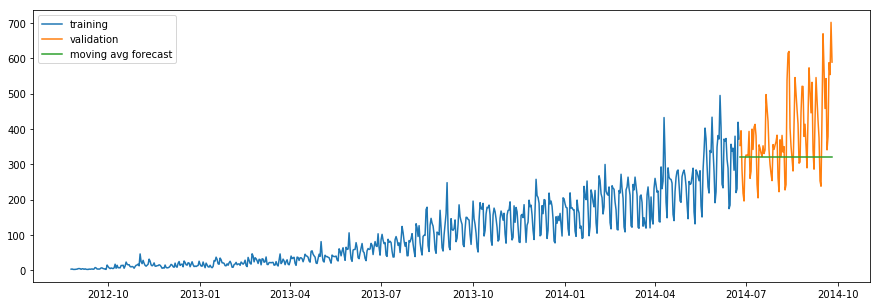

In [33]:
#20 days average
y_hat_avg = valid_split.copy()
y_hat_avg['moving avg forecast'] = train_split['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train_split['Count'], label='training')
plt.plot(valid_split['Count'], label='validation')
plt.plot(y_hat_avg['moving avg forecast'], label='moving avg forecast')
plt.legend(loc = 'best')
plt.show()

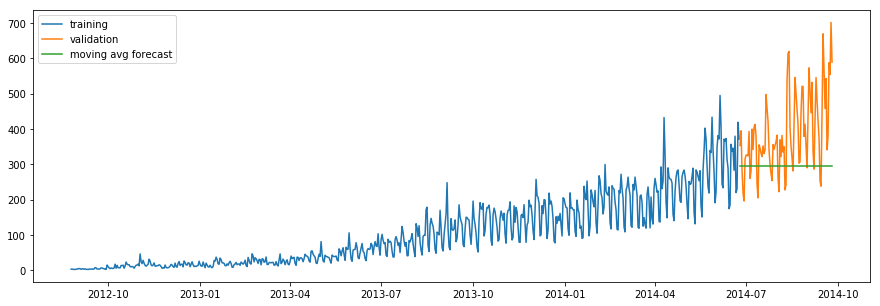

In [34]:
#50 days average
y_hat_avg = valid_split.copy()
y_hat_avg['moving avg forecast'] = train_split['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(train_split['Count'], label='training')
plt.plot(valid_split['Count'], label='validation')
plt.plot(y_hat_avg['moving avg forecast'], label='moving avg forecast')
plt.legend(loc = 'best')
plt.show()

# Simple Exponential Smoothing

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

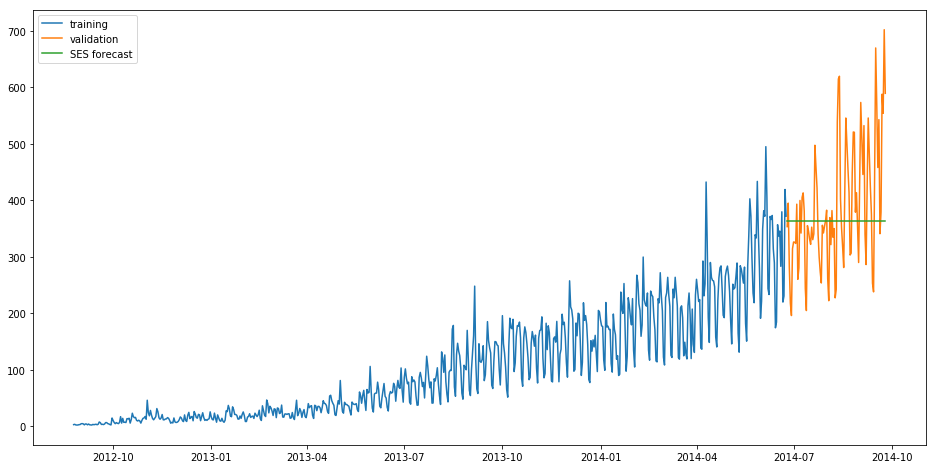

In [36]:
y_hat_average = valid_split.copy()
fit2 = SimpleExpSmoothing(np.asarray(train_split['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_average['SES'] = fit2.forecast(len(valid_split))
plt.figure(figsize = (16,8))
plt.plot(train_split['Count'], label='training')
plt.plot(valid_split['Count'], label='validation')
plt.plot(y_hat_average['SES'], label='SES forecast')
plt.legend(loc='best')
plt.show()

# Holt's Linear Trend Model

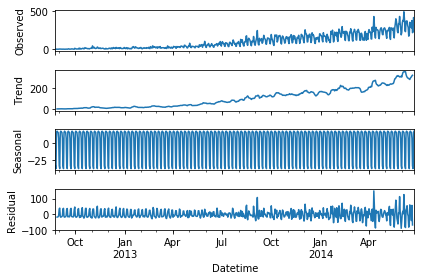

In [37]:
#visualizing observed, trend, seasonality and residual
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train_split.Count).plot()
result = sm.tsa.stattools.adfuller(train_split.Count)
plt.show()

In [38]:
#increasing trend observed

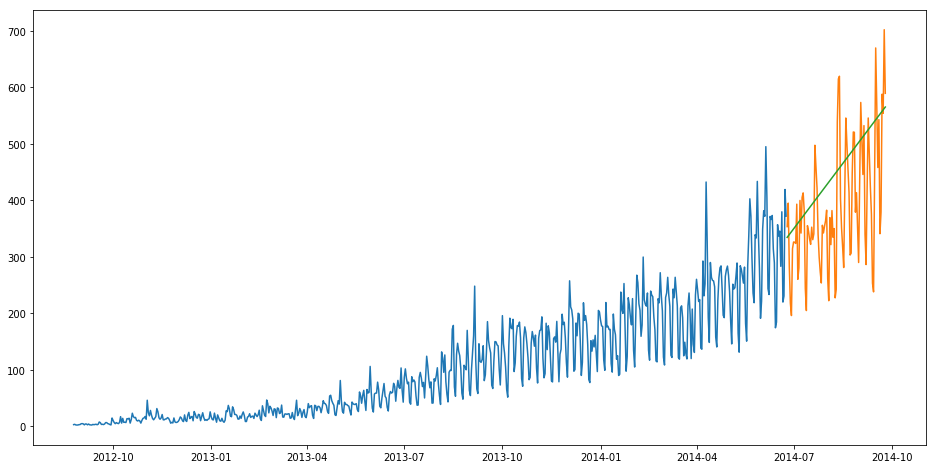

In [39]:
y_hat_avg_holt = valid_split.copy()
fit1 = Holt(np.asarray(train_split['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg_holt['Holt_linear'] = fit1.forecast(len(valid_split))
plt.figure(figsize=(16,8))
plt.plot(train_split['Count'], label='training')
plt.plot(valid_split['Count'], label='validation')
plt.plot(y_hat_avg_holt['Holt_linear'], label='forecast')
plt.show()

In [40]:
#prediction on test data
predict = fit1.forecast(len(test))
test['prediction'] = predict
predict

array([334.65076685, 337.15901127, 339.66725568, 342.1755001 ,
       344.68374451, 347.19198892, 349.70023334, 352.20847775,
       354.71672217, 357.22496658, 359.73321099, 362.24145541,
       364.74969982, 367.25794424, 369.76618865, 372.27443307,
       374.78267748, 377.29092189, 379.79916631, 382.30741072,
       384.81565514, 387.32389955, 389.83214396, 392.34038838,
       394.84863279, 397.35687721, 399.86512162, 402.37336604,
       404.88161045, 407.38985486, 409.89809928, 412.40634369,
       414.91458811, 417.42283252, 419.93107694, 422.43932135,
       424.94756576, 427.45581018, 429.96405459, 432.47229901,
       434.98054342, 437.48878783, 439.99703225, 442.50527666,
       445.01352108, 447.52176549, 450.03000991, 452.53825432,
       455.04649873, 457.55474315, 460.06298756, 462.57123198,
       465.07947639, 467.58772081, 470.09596522, 472.60420963,
       475.11245405, 477.62069846, 480.12894288, 482.63718729,
       485.1454317 , 487.65367612, 490.16192053, 492.67

In [41]:
#convert daily prediction to hourly
#calculate ratio of passenger count for each hour of everyday
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [42]:
#grouping hourly ratio
temp = train_original.groupby(['Hour'])['ratio'].sum()

# Holt's Winter Method

In [43]:
y_hat_win = valid_split.copy()
fit = ExponentialSmoothing(np.asarray(train_split['Count']), seasonal_periods=7, trend='add', seasonal='add').fit()

In [44]:
y_hat_win['Holt_Winter'] = fit.forecast(len(valid_split))

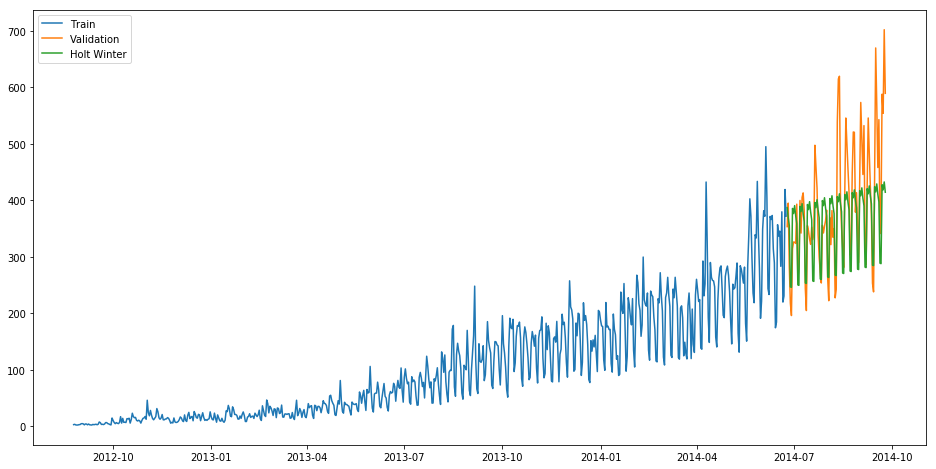

In [45]:
plt.figure(figsize=(16,8))
plt.plot(train_split['Count'], label='Train')
plt.plot(valid_split['Count'], label='Validation')
plt.plot(y_hat_win['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [46]:
rms = sqrt(mean_squared_error(valid_split.Count, y_hat_win.Holt_Winter))
rms

82.37467736825413

In [47]:
#prediction for test set
predict = fit.forecast(len(test))

In [48]:
test['prediction'] = predict

In [49]:
#merge test and test original on day, month, year
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)

# ARIMA Model

In [51]:
#SARIMAX Model
import statsmodels.api as sm
y_hat_avg = valid_split.copy()

In [52]:
fit = sm.tsa.statespace.SARIMAX(train_split.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit.predict(start='2014-6-25', end='2014-9-25', dynamic=True)

C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Pooja Phadke\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
